#### The following packages will be need to be installed:
- First install [`geopandas`](https://geopandas.org/index.html)
    - after install make sure the following [dependencies](https://geopandas.org/install.html) are installed (if not install them separately in order below)
        - fiona
        - shapely
        - pyproj
        - six
        - rtree
        - descartes
- Next install [`folium`](https://python-visualization.github.io/folium/)


In [1]:
from shapely.geometry import Point   #This is to pull Point module (could import ,Line after Point if wanted)
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster



#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')  #Using gpd geopandas to read in the file
print(zipcodes.crs)
zipcodes.head( )
#  We'll reset the dictionary {'init': 'epsc:4326'}  to be something else. See slide deck page 13 (and Evernote note

{'init': 'epsg:4326'}


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


#### Note that the crs contains init and needs to be [updated](https://geopandas.org/projections.html) so we'll do that

In [3]:
#Open link above to learn why EPSG has to be all caps.
zipcodes.crs = "EPSG:4326"
print(zipcodes.crs)

EPSG:4326


#### Now let's look at the difference between calling the first geometry variable.....


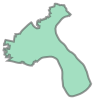

In [4]:
zipcodes.loc[0, 'geometry']   #This prints out the polygon

#### ...and printing it


In [5]:
print(zipcodes.loc[0, 'geometry'])
#This gives lat/long pairs

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.68714696276101 36.318206917893, -86.68711218725601 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.68703469075101 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.68690382778099 36.318191625285, -86.68686914958001 36.318189102792, -86.68683443743301 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.68655731872499 36.318162634491, -86.686522735235 36.318159287854, -86.68648815149901 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813001 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549014999 36

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


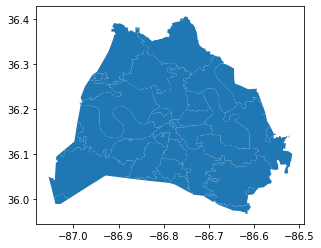

In [6]:
zipcodes.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by `matplotib`

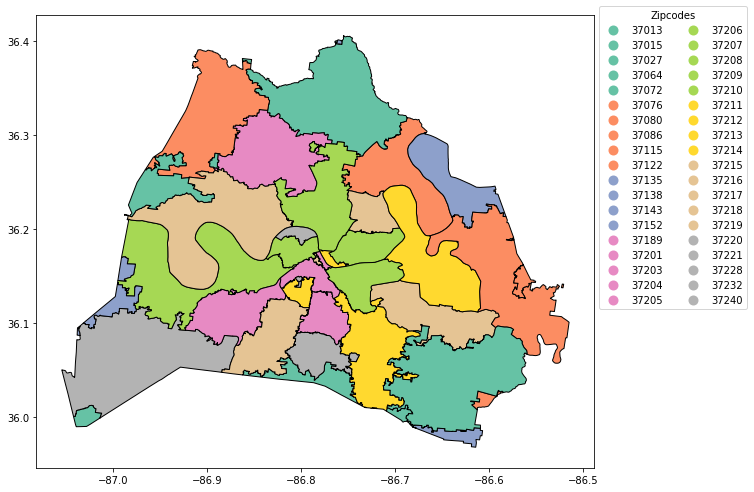

In [7]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),   #This makes it bigger
              edgecolor = 'black',              #To draw outlines
              legend = True, legend_kwds = leg_kwds,   #add legend
              cmap = 'Set2')                    #Set color map - see link to colormap, above
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [8]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
print(bus_stops.shape)
bus_stops.head(3)

(2524, 5)


,stop,route,location,lat,lng
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004


#### In order to spatially join the bus stops with the zipcodes, you will need to create a GeoDataFrame of bus stops
- First create a geometry column that is a `Point` datatype

In [9]:
bus_stops['geometry'] = bus_stops.apply(lambda x: Point((float(x.lng),   
                                                         float(x.lat))), 
                                        axis=1)
bus_stops.head(3)
#df.apply applies something to every row in a df, 
#lambda is temporary, not going to use it again
# For every fow, take longitude, put it with long, make a typle

,stop,route,location,lat,lng,geometry
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.816722 36.236249)
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.780897 36.142642)
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004,POINT (-86.672004 36.105615)


#### Now that the bus stops data has a geometry field, you can use it to build a GeoDataFrame 
- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [10]:
zipcodes.crs   #This tells us what tpe of geodataframe this is

'EPSG:4326'

In [11]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = zipcodes.crs,                #Could say 'EPSG:4326', but better to name the df
                           geometry = bus_stops['geometry'])  #Tell it which column to use

#### Now you are ready to combine bus stops and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the bus stops within a zip code polygon
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [12]:
type(bus_geo)     #This is now a GeoDataFrame

geopandas.geodataframe.GeoDataFrame

In [13]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [14]:
stops_by_zip = gpd.sjoin(bus_geo, zipcodes, op = 'within')   #Put the bus stops that are within the zipcode
#If did the opposite order, and switch to 'contains', would get the number of zip codes with at least 1 zip codes

In [15]:
stops_by_zip.head()
#index_right shows the index number from right df (multiple stops in each zipcode)

,stop,route,location,lat,lng,geometry,index_right,zip,po_name
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.81672 36.23625),18,37189,WHITES CREEK
976,OLD HICKORY BLVD & COBBLESTONE CREEK DR EB,HICKORY HILLS,"(36.278199, -86.789015)",36.278199,-86.789015,POINT (-86.78902 36.27820),18,37189,WHITES CREEK
1668,WHITES CREEK HIGH SCHOOL,HICKORY HILLS,"(36.276203, -86.819009)",36.276203,-86.819009,POINT (-86.81901 36.27620),18,37189,WHITES CREEK
2161,GREEN LN & KNIGHT DR WB,GOLDEN VALLEY,"(36.236813, -86.803848)",36.236813,-86.803848,POINT (-86.80385 36.23681),18,37189,WHITES CREEK
2483,OLD HICKORY BLVD & COBBLESTONE CREEK DR WB,HICKORY HILLS,"(36.278342, -86.788981)",36.278342,-86.788981,POINT (-86.78898 36.27834),18,37189,WHITES CREEK


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [16]:
stops_by_zip['zip'].value_counts()

37207    272
37203    237
37206    205
37211    174
37208    165
37209    149
37210    141
37217    121
37115    106
37013    103
37204     90
37216     88
37214     87
37212     86
37218     83
37215     53
37205     52
37076     50
37219     48
37221     45
37201     36
37138     32
37228     27
37213     10
37027      9
37072      7
37189      5
37240      4
Name: zip, dtype: int64

#### Let's take a closer look at the 272 bus stops in the 37207 zip code
- filter the stops_by_zip data to just get bus stops in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [17]:
stops_in_37207 = stops_by_zip.loc[stops_by_zip['zip'] == '37207']   
stops_in_37207.shape
#Because zip is a keyword must use quotes. Of not, could do stops_by_zip.zip

(272, 9)

In [18]:
polygon37207 = zipcodes.loc[zipcodes['zip'] == '37207']
polygon37207.shape
#Doing this to filter down the bus stops in 37207
#This is a problem... thre are 2 polygons

(2, 3)

#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

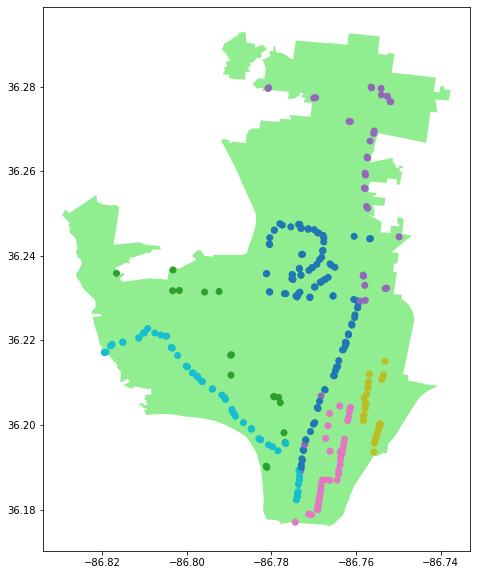

In [19]:
ax1 = polygon37207.plot(figsize = (8, 10), color = 'lightgreen')  #to plot zipcode. ax1 is a variable name.
stops_in_37207.plot( ax = ax1, column = 'route');                #to plot bus stops. Colors bus routes the same.
plt.show();                                                     #Must use this.

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [20]:
polygon37207.geometry.centroid  #To find out center of polygon
# Look at map above, 36.23 is further south, that's the centroid we need.

19    POINT (-86.78726 36.28724)
42    POINT (-86.77677 36.23245)
dtype: geometry

In [21]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37207.geometry.centroid[42]
print(center)
#This is LONGITUTE first. Folium wants LATITUDE first

POINT (-86.77676762469858 36.23245257407244)


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [22]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]    #Square brackets create an array

# check the order of area_center, the location for our folium map
print(area_center)

#Now we have latitude first, can make a folium map.

[36.23245257407244, -86.77676762469858]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [23]:
#create our map of Nashville and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)  #higher number = zoomed in more
map_37207

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for each row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [24]:
for row_index, row_values in stops_in_37207.iterrows():
    print('index is', row_index)
    print('values are:')
    print(' ')
    print(row_values)
    print('------------------------- ')

index is 9
values are:
 
stop                  DOVERSIDE DR & MOORWOOD DR EB
route                                DICKERSON ROAD
location                    (36.240342, -86.772854)
lat                                         36.2403
lng                                        -86.7729
geometry       POINT (-86.77285400000001 36.240342)
index_right                                      42
zip                                           37207
po_name                                   NASHVILLE
Name: 9, dtype: object
------------------------- 
index is 11
values are:
 
stop           ROWAN DR & BUENA VISTA PIKE SB
route                            WHITES CREEK
location               (36.21714, -86.819509)
lat                                   36.2171
lng                                  -86.8195
geometry          POINT (-86.819509 36.21714)
index_right                                42
zip                                     37207
po_name                             NASHVILLE
Name: 11, dtype: 

Name: 900, dtype: object
------------------------- 
index is 908
values are:
 
stop            VAILVIEW DR & ROBWOOD DR EB
route                        DICKERSON ROAD
location            (36.237993, -86.769273)
lat                                  36.238
lng                                -86.7693
geometry       POINT (-86.769273 36.237993)
index_right                              42
zip                                   37207
po_name                           NASHVILLE
Name: 908, dtype: object
------------------------- 
index is 931
values are:
 
stop                  DICKERSON PIKE & LIGON AVE SB
route                                DICKERSON ROAD
location                    (36.194193, -86.772489)
lat                                         36.1942
lng                                        -86.7725
geometry       POINT (-86.77248900000001 36.194193)
index_right                                      42
zip                                           37207
po_name                       

Name: 1155, dtype: object
------------------------- 
index is 1157
values are:
 
stop           OAKWOOD AVE & BULLOCK AVE NB
route                              McFERRIN
location            (36.215088, -86.753136)
lat                                 36.2151
lng                                -86.7531
geometry       POINT (-86.753136 36.215088)
index_right                              42
zip                                   37207
po_name                           NASHVILLE
Name: 1157, dtype: object
------------------------- 
index is 1165
values are:
 
stop           BAPTIST WORLD CENTER DR & MEADE AVE NB
route                                    WHITES CREEK
location                      (36.203677, -86.789335)
lat                                           36.2037
lng                                          -86.7893
geometry         POINT (-86.78933499999999 36.203677)
index_right                                        42
zip                                             37207
po_name   

stop           REVELS DR & WHITES CREEK PIKE WB
route                              WHITES CREEK
location                (36.221037, -86.804929)
lat                                      36.221
lng                                    -86.8049
geometry           POINT (-86.804929 36.221037)
index_right                                  42
zip                                       37207
po_name                               NASHVILLE
Name: 2173, dtype: object
------------------------- 
index is 2175
values are:
 
stop              HUNTER'S LANE HIGH SCHOOL
route                         HICKORY HILLS
location            (36.279607, -86.754053)
lat                                 36.2796
lng                                -86.7541
geometry       POINT (-86.754053 36.279607)
index_right                              42
zip                                   37207
po_name                           NASHVILLE
Name: 2175, dtype: object
------------------------- 
index is 2177
values are:
 
stop      

index is 2349
values are:
 
stop           WHITES CREEK PIKE & TONEY RD WB
route                             WHITES CREEK
location               (36.208556, -86.793926)
lat                                    36.2086
lng                                   -86.7939
geometry          POINT (-86.793926 36.208556)
index_right                                 42
zip                                      37207
po_name                              NASHVILLE
Name: 2349, dtype: object
------------------------- 
index is 2361
values are:
 
stop           WHITES CREEK PIKE & TONEY RD SB
route                             WHITES CREEK
location               (36.208485, -86.793982)
lat                                    36.2085
lng                                    -86.794
geometry          POINT (-86.793982 36.208485)
index_right                                 42
zip                                      37207
po_name                              NASHVILLE
Name: 2361, dtype: object
-------------------

#### The map_37207 has already been created.
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the route column
    - build a marker from each location and popup
    - add the marker to  `map_37207`
- display `map_37207`

In [25]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#folium.GeoJson(polygon37207).add_to(map_37207)  
    #DOESN'T WORK. Might need to save that to a file, then read in the file.

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map_37207)
map_37207.save('../maps/map37207.html')   #Tell it the path to save the map to (make sure we have a maps folder)

#display our map
map_37207

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

In [26]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster, and adds it to the map.
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

#folium.GeoJson(polygon37207).add_to(cluster_map_37207)
    #DOESN'T WORK. Might need to save that to a file, then read in the file.

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    marker = folium.Marker(
        location = loc, 
        popup = pop)   #To customize marker, could put  pop, icon =  (look up in documentation)
    
    marker.add_to(marker_cluster)    #Adding it to marker cluster, not on the map directly

    
#save an interactive HTML map by calling .save()
cluster_map_37207.save('../maps/cluster37207.html')

cluster_map_37207  

In [27]:
#If have tons of locations, FastMarkerCluster runs faster.  No popups available on FastMarkerCluster
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#folium.GeoJson(polygon37207).add_to(map_37207)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37207[['lat', 'lng']].values.tolist()
map_37207.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37207